In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../data/nodejs-node/csv/data.csv", index_col=0) 


Шаг 1: Подготовка данных

Проверка и очистка данных:

Так как количество языков недостаточно, чтобы выявить направление специализации разработчика, то переведем данный признак в численное количество приобретенных навыков.

In [19]:
def langs_to_num(row):
    row = eval(row)
    row = [i for a,i in enumerate(row) if i!='']
    return len(row)
df['Languages'] = df['Languages'].apply(langs_to_num)

In [20]:
df = df.drop(['FirstDataActivity'], axis=1)
df = df.drop(['LastDataActivity'], axis=1)
df

,Contributions,CommitEvent,Additions,Deletions,Languages,CommitCommentEvent,DeleteEvent,IssueCommentEvent,PullRequestEvent,PullRequestReviewEvent,PullRequestReviewCommentEvent,PushEvent,ReleaseEvent,IssuesEvent,CreateIssueEvent,PermissionRole
Trott,3124,6,7053,13819,1,0,0,21,8,6,5,0,0,54,0,3
bnoordhuis,2289,1,162,8,1,0,0,3,0,0,0,0,0,160,0,1
addaleax,1591,2,22,0,2,0,0,4,2,0,0,0,0,129,1,2
targos,1120,90,558566,130719,9,0,0,533,44,1,0,0,3,1422,12,3
cjihrig,1105,29,2784,519,2,0,0,95,26,0,0,0,0,225,2,2
jasnell,973,3,3375,1403,2,0,0,33,4,0,0,0,0,324,3,3
joyeecheung,931,67,9194,2316,6,0,0,380,50,0,0,0,0,447,12,2
tniessen,688,16,453,73,4,0,0,89,15,0,0,0,0,310,3,3
aduh95,652,26,1357,610,4,0,0,450,34,10,6,0,0,1232,11,3
nodejs-github-bot,523,98,285600,191563,7,0,1,4104,103,0,0,3,0,3297,4,3


Удалять дубликаты, обрабатывать пропуски нам не нужно. Перейдем к корреляции признаков. Стоит обратить внимание на признаки с высокой корреляцией — тёмно-красные и тёмно-синие клетки. Близость к единице означает сильно выраженную положительную линейную зависимость, а близость к -1 — сильно выраженную отрицательную зависимость.

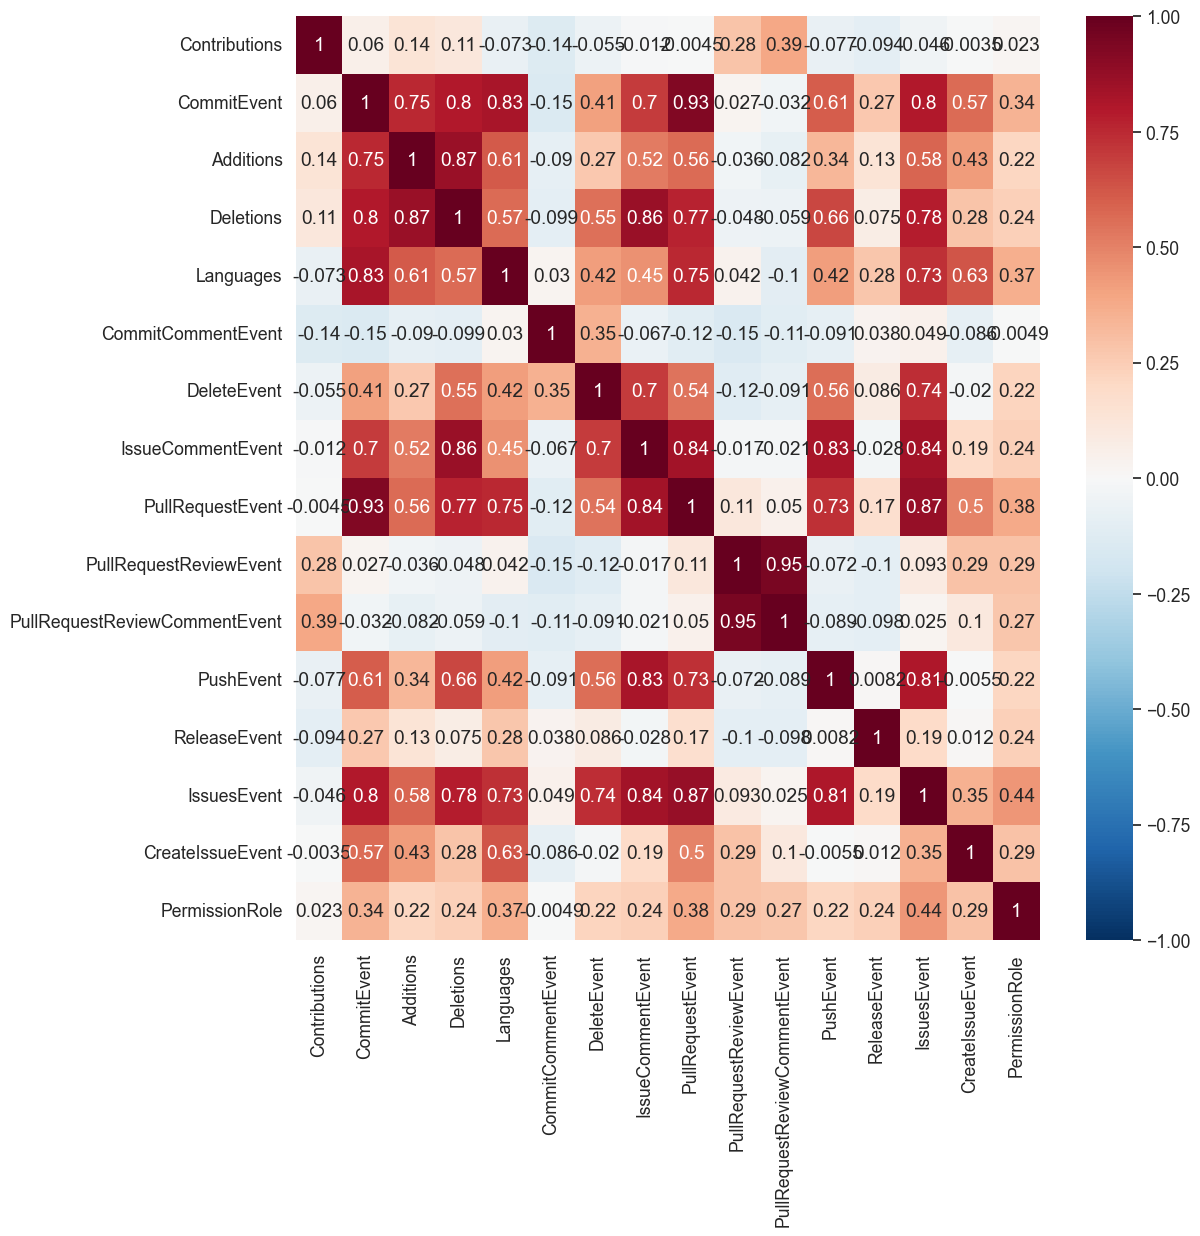

In [21]:
sns.set(font_scale=1.15)
plt.figure(figsize=(12,12))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

Заметна очень высокая положительная корреляция между притоком и оттоком кода. Возьмем разницу этих признаков и получим значение новых строчек кода в проекте, которые не изменялись.

Масштабирование и нормализация:

In [22]:
from sklearn.preprocessing import StandardScaler, normalize
scaling=StandardScaler()
scaling.fit(df)
scaled_data=scaling.transform(df)

X_normalized = normalize(scaled_data)
X_normalized = pd.DataFrame(X_normalized)

Шаг 2: Предварительный анализ данных

Статистический анализ:
   - Используйте описательную статистику для понимания основных характеристик данных (среднее, медиана, стандартное отклонение).
   - Постройте распределения для каждого параметра, чтобы увидеть их вариативность и возможные выбросы.

In [8]:
stats = X_normalized.agg(['mean', 'median', 'std'])
print(stats)

              0         1         2         3         4         5         6   \
mean    0.001807  0.058856  0.038716 -0.045249 -0.021422 -0.033390 -0.060396   
median -0.182181 -0.058397  0.069555 -0.111122 -0.093358 -0.112916 -0.114286   
std     0.325156  0.357667  0.268589  0.214199  0.261315  0.239795  0.232174   

              7         8         9         10        11        12        13  \
mean    0.031713 -0.021637 -0.034919 -0.045249 -0.025591 -0.031831  0.035124   
median  0.096334 -0.137074 -0.118077 -0.111122 -0.078163 -0.120156  0.111122   
std     0.330113  0.283871  0.257360  0.214199  0.231980  0.233846  0.240624   

              14  
mean   -0.025188  
median -0.080269  
std     0.320136  


- Средние значения для всех признаков (столбцов) находятся в отрицательной области, за исключением столбца 11, который имеет положительное среднее значение.
- Это может указывать на смещение данных в отрицательную сторону.
- Медианы также преимущественно отрицательны, что указывает на схожее распределение с средними значениями. 
- Стандартные отклонения варьируются от 0.130 до 0.378. Это говорит о различной степени вариативности среди признаков. Например, столбец 11 имеет наибольшую вариативность, а столбец 12 — наименьшую.

=>
- Поскольку и средние, и медианы значений отрицательны, возможно, данные имеют общий сдвиг в отрицательную область. Это может быть результатом предварительной обработки данных (масштабирования или нормализации).
- Вариативность данных различна для разных признаков, что может указывать на разную значимость этих признаков в последующем анализе.

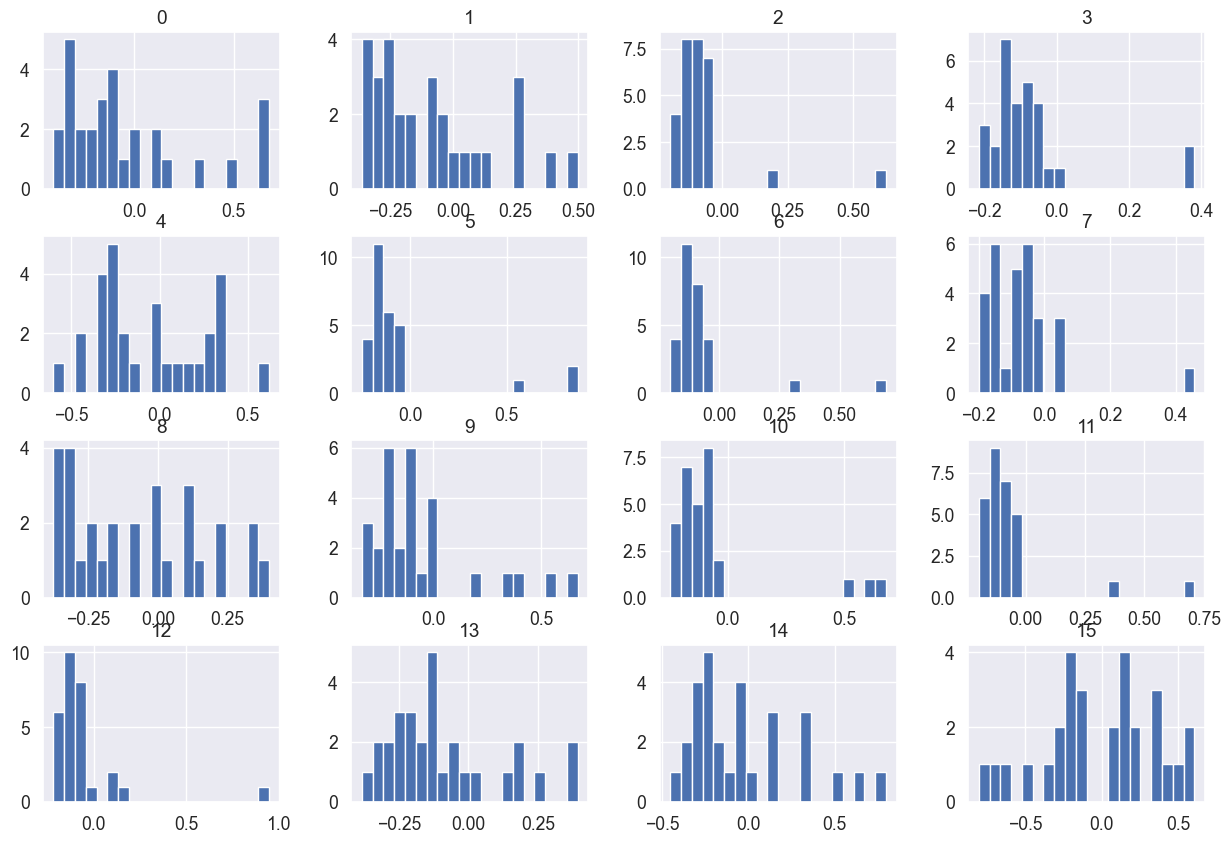

In [23]:
X_normalized.hist(bins=20, figsize=(15,10))
plt.show()

Box plots используем для выявления выбросов и анализа симметричности распределения

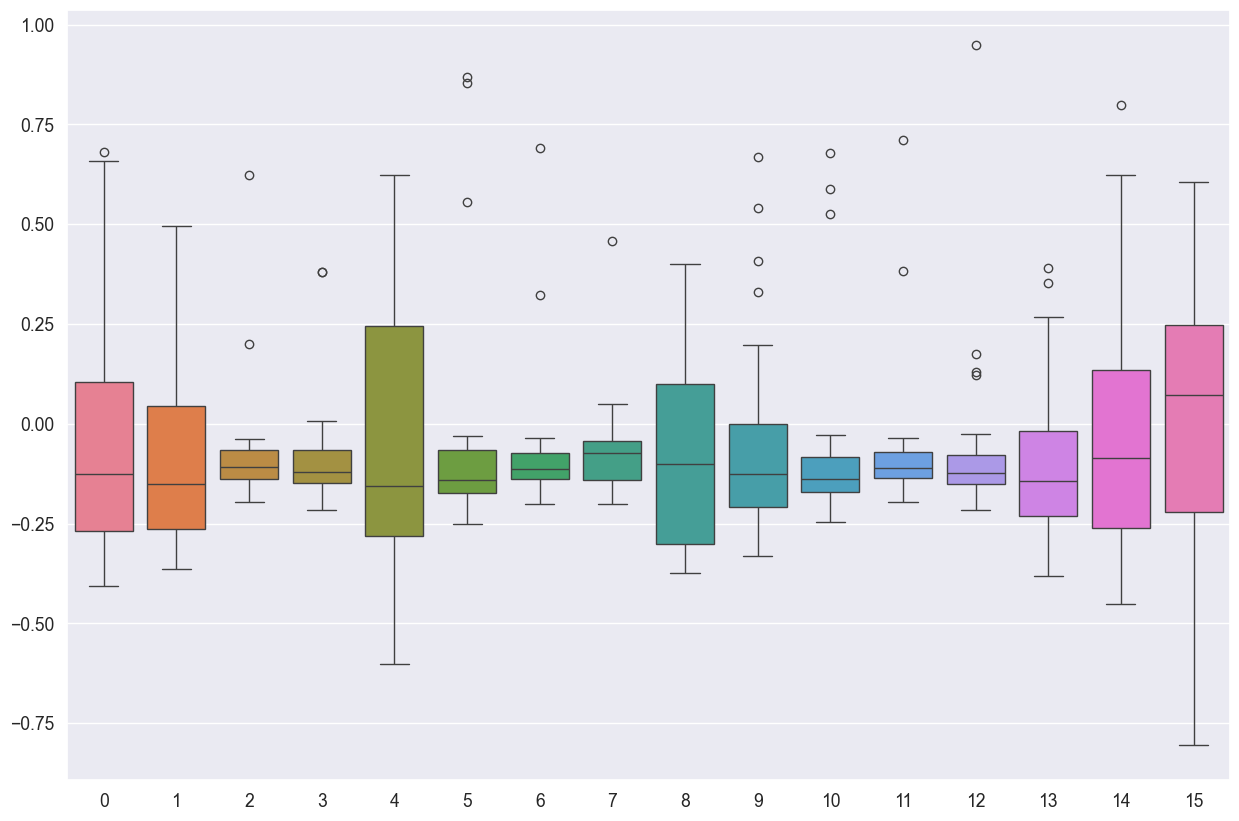

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_normalized)
plt.show()

Тк используется Standard Scaling, отрицательные значения и смещение данных в отрицательный диапазон являются нормальными. Однако, важно оценить, насколько это смещение влияет на дальнейший анализ.

Используем трансформации, такие как Box-Cox или Yeo-Johnson, чтобы сделать распределение данных более симметричным. 

‘yeo-johnson’, works with positive and negative values

‘box-cox’, only works with strictly positive values

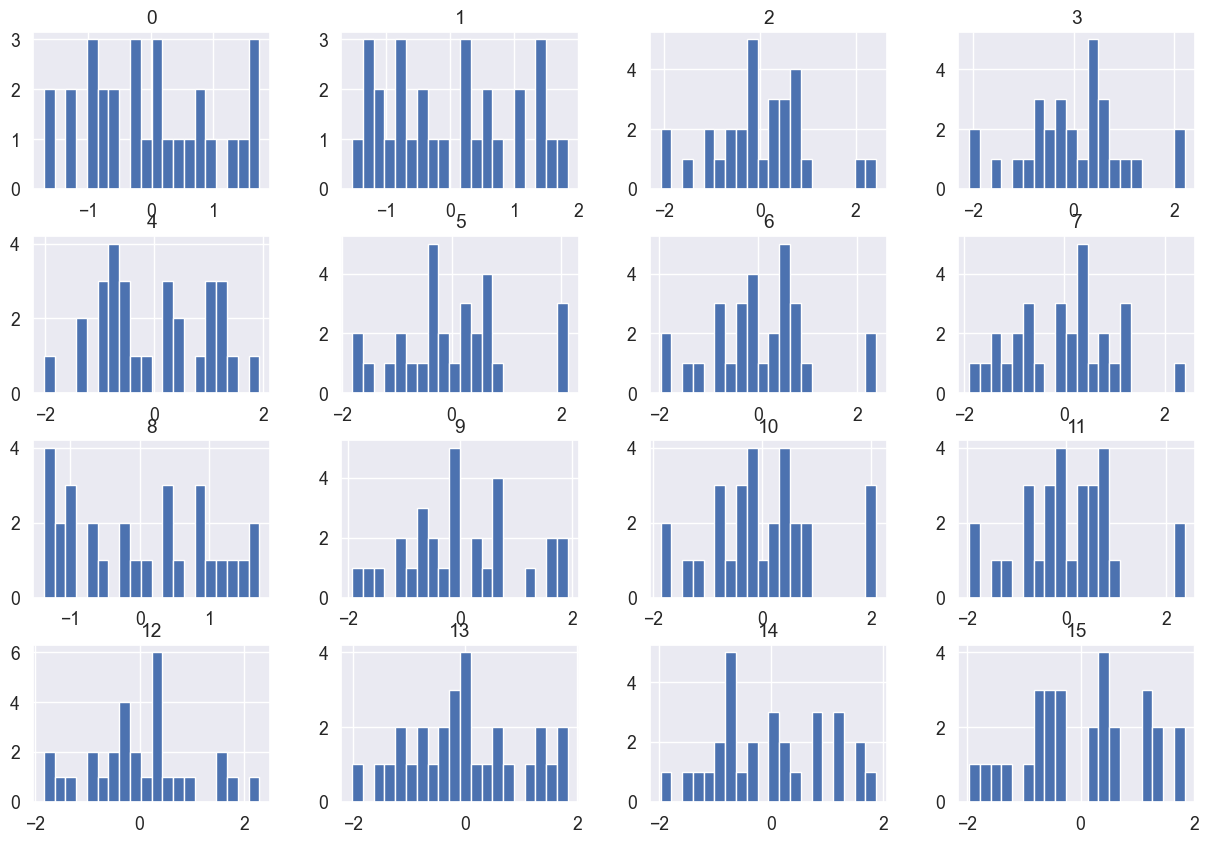

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_normalized)
X_transformed = pt.transform(X_normalized)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.hist(bins=20, figsize=(15,10))
plt.show()

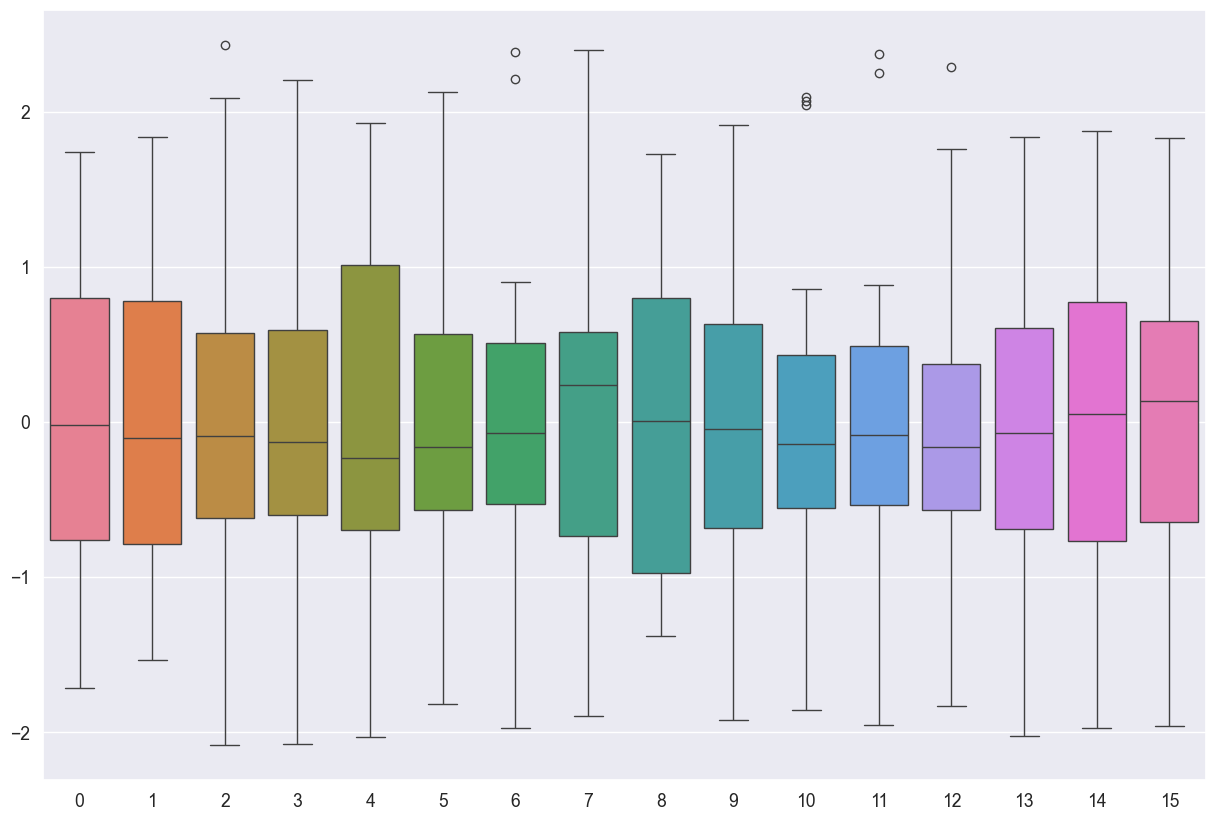

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_transformed)
plt.show()

Смещение данных влево отсутсвует, выбросов стало меньше.

Шаг 3: Факторный анализ

Выделение главных компонентов (PCA) для уменьшения размерности данных, сохраняя при этом максимальную вариативность. Это поможет выявить основные направления (факторы), по которым различаются разработчики.

In [27]:
from sklearn.decomposition import PCA
# scal_df = df.drop(['PermissionRole'], axis=1)

principal=PCA(n_components=3)
principal.fit(X_transformed)
x=principal.transform(X_transformed)

In [28]:
import plotly.express as px

total_var = principal.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    x, x=0, y=1, z=2, color=df['PermissionRole'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Визуализировав данные после метода главных компонент и взяв за цветовую классификацию уровни доступа разработчика, можно заметить четкое диагональное разделение на графике ниже

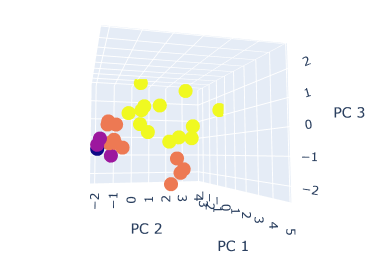

Кластеризация:

- Применим кластерные алгоритмы (например, K-Means, DBSCAN, Hierarchical Clustering) на основе преобразованных данных.
- Определим оптимальное количество кластеров, используя метод локтя или силуэтный анализ.

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from kneed import KneeLocator

distortions = []
inertias = []
K = range(1, len(x))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [32]:
knee_locator_distortion = KneeLocator(K, distortions, curve='convex', direction='decreasing')
knee_locator_inertia = KneeLocator(K, inertias, curve='convex', direction='decreasing')

optimal_k_distortion = knee_locator_distortion.elbow
optimal_k_inertia = knee_locator_inertia.elbow

from statistics import mean

num_of_clusters = round(mean([optimal_k_distortion, optimal_k_inertia]))

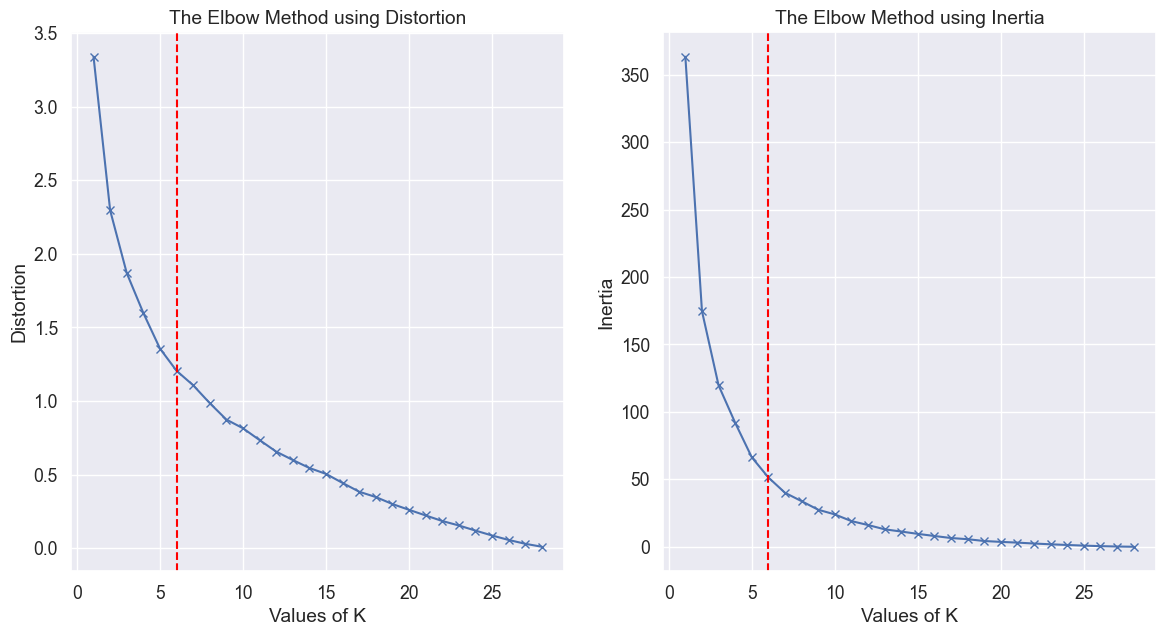

In [33]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.axvline(optimal_k_distortion, color='red', linestyle='--')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.axvline(optimal_k_inertia, color='red', linestyle='--')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

Чтобы определить оптимальное количество кластеров, мы должны выбрать значение k в “локте”, то есть точке, после которой искажение / инерция начинает линейно уменьшаться. Таким образом, для приведенных данных мы приходим к выводу, что оптимальное количество кластеров для данных равно 7.

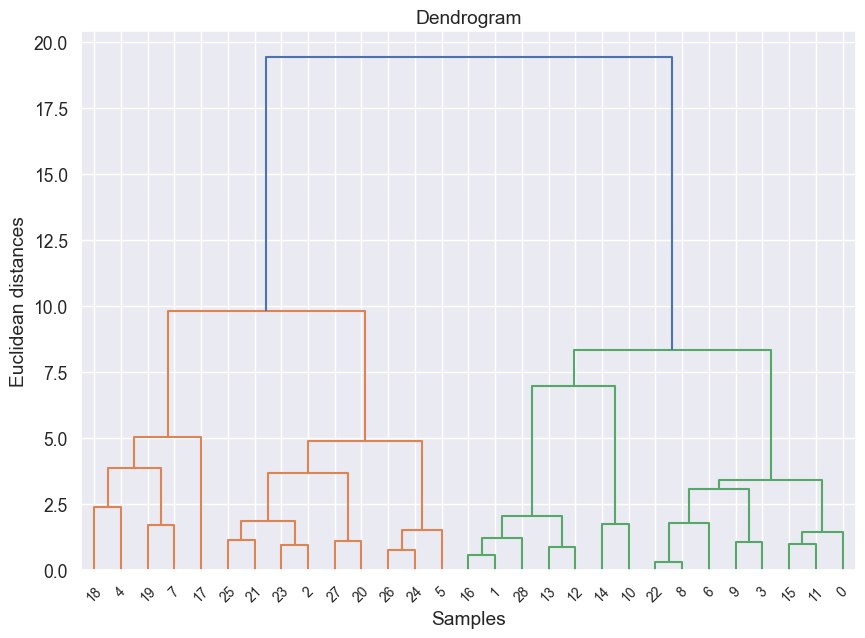

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(x, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

max_d = 7
clusters = fcluster(linked, max_d, criterion='distance')

In [57]:
clusters

array([1, 1, 4, 2, 4, 4, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 3, 4, 3, 4, 4,
       2, 4, 4, 4, 4, 4, 4], dtype=int32)

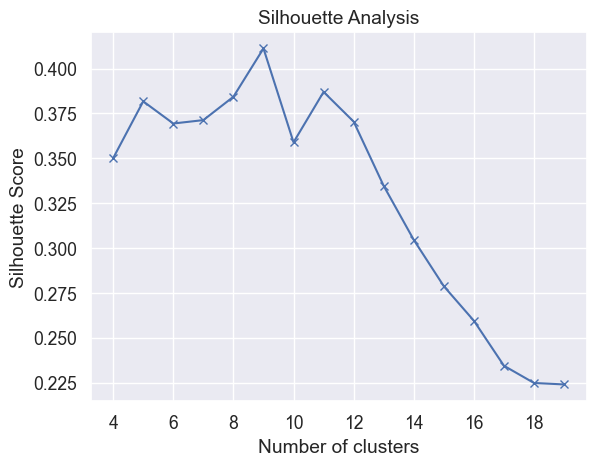

Optimal number of clusters: 9


In [35]:
from sklearn.metrics import silhouette_score

linked = linkage(x, method='ward')

range_n_clusters = range(4, 20)
silhouette_scores = []

for n_clusters in range_n_clusters:
    cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]

# Визуализация silhouette scores
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
# plt.savefig('silhouette_analysis.png')
plt.show()

print(f'Optimal number of clusters: {optimal_clusters}')

In [36]:
cluster_labels = fcluster(linked, 9, criterion='maxclust')
cluster_labels

array([1, 3, 6, 1, 8, 4, 1, 7, 1, 1, 2, 1, 3, 3, 2, 1, 3, 9, 8, 7, 5, 6,
       1, 6, 4, 6, 4, 5, 3], dtype=int32)

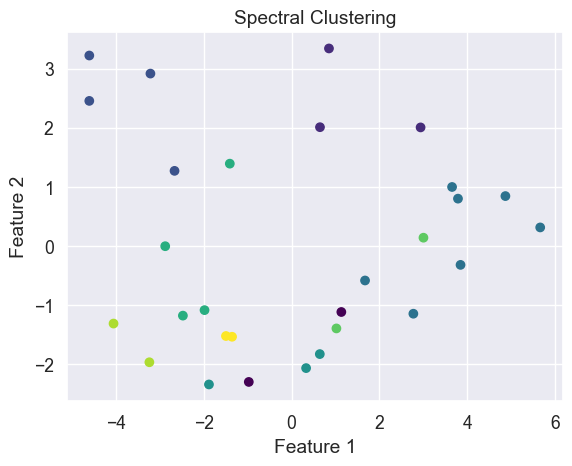

In [37]:
from sklearn.cluster import SpectralClustering

# Применение Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(x)

# Визуализация результатов
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.savefig('spectral_clustering.png')
plt.show()


In [44]:
labels

array([7, 2, 3, 1, 3, 3, 0, 4, 1, 1, 6, 1, 1, 7, 0, 8, 8, 4, 3, 4, 5, 5,
       1, 2, 3, 5, 3, 5, 2])

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



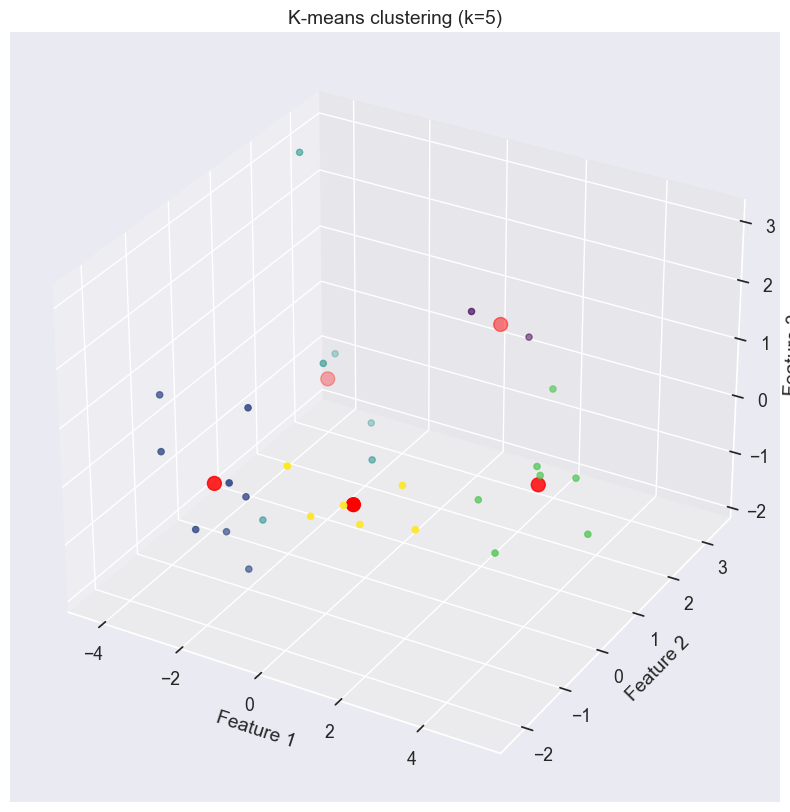

In [46]:
kmeans = KMeans(n_clusters=num_of_clusters, \
				init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_kmeans, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0],
		kmeans.cluster_centers_[:, 1],
		kmeans.cluster_centers_[:, 2], 
		s=100, c='red')
ax.set_title('K-means clustering (k={})'.format(num_of_clusters))
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


Шаг 4: Интерпретация результатов
   - Для каждого кластера определяем характерные черты (распределения параметров).
   - Сравнение кластеров между собой, чтобы выделить уникальные шаблоны поведения.

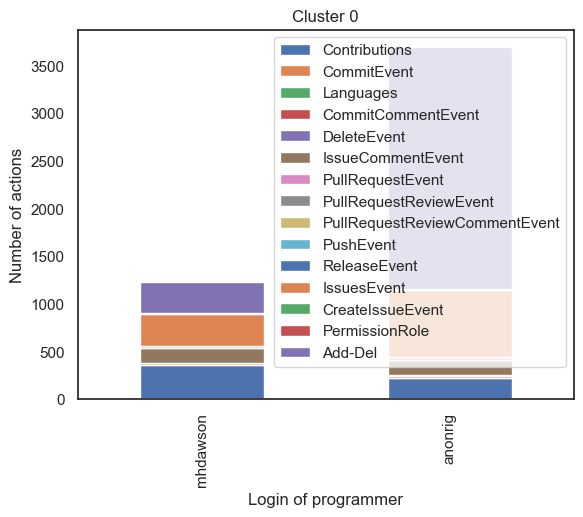

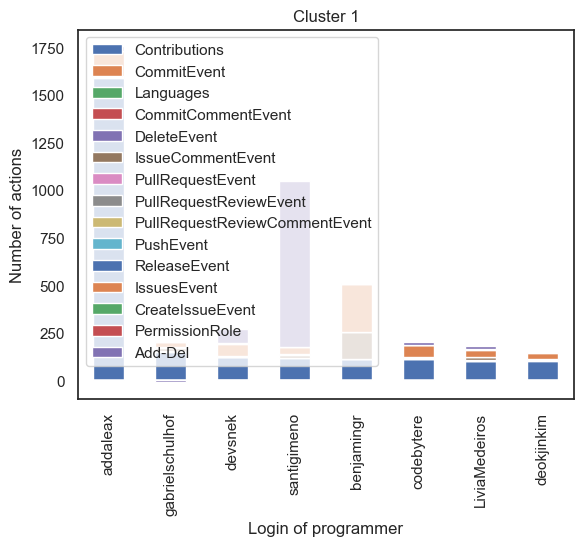

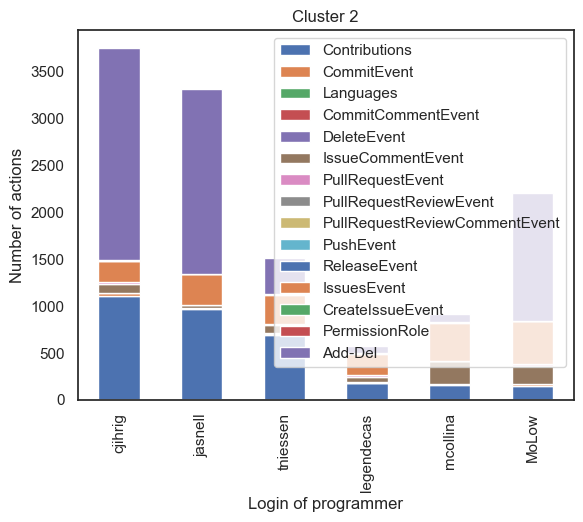

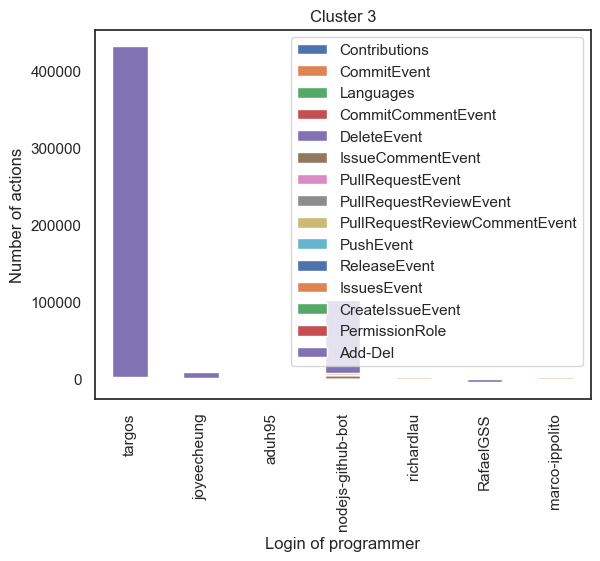

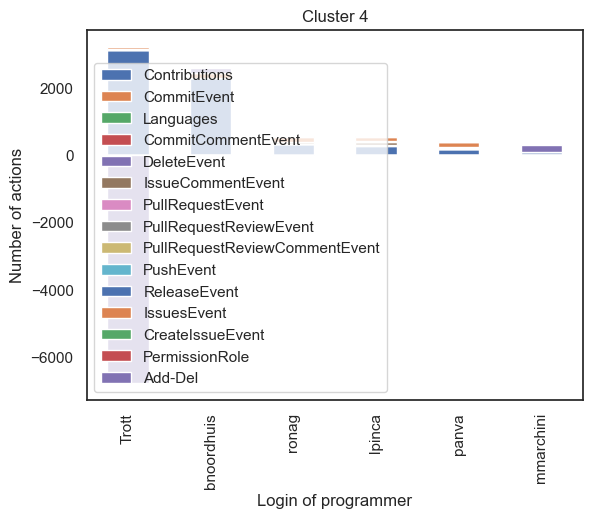

In [47]:
clusters_info = pd.DataFrame(columns=df.columns)

for cluster in np.unique(y_kmeans):
    cluster_df = df[y_kmeans == cluster]
    
    sns.set(style='white')
    cluster_df.set_index(cluster_df.index).plot(kind='bar', stacked= True)
    cluster_info = {'Cluster': cluster}
    for col in df.columns:
        cluster_info[col] = str(min(cluster_df[col])) + ' - ' + str(max(cluster_df[col]))
    
    clusters_info.loc[len(clusters_info)] = cluster_info

    plt.ylabel('Number of actions')
    plt.xlabel('Login of programmer')
    plt.title(f'Cluster {cluster}')
    plt.show()

In [48]:
clusters_info

,Contributions,CommitEvent,Languages,CommitCommentEvent,DeleteEvent,IssueCommentEvent,PullRequestEvent,PullRequestReviewEvent,PullRequestReviewCommentEvent,PushEvent,ReleaseEvent,IssuesEvent,CreateIssueEvent,PermissionRole,Add-Del
0,222 - 363,18 - 25,5 - 6,0 - 0,0 - 0,150 - 160,20 - 33,1 - 2,0 - 0,0 - 0,0 - 0,341 - 699,6 - 10,2 - 3,322 - 2537
1,101 - 1591,1 - 4,0 - 3,0 - 0,0 - 0,2 - 141,0 - 5,0 - 0,0 - 0,0 - 0,0 - 0,30 - 254,0 - 2,1 - 3,-10 - 871
2,151 - 1105,3 - 29,2 - 4,0 - 0,0 - 0,33 - 239,4 - 26,0 - 2,0 - 0,0 - 0,0 - 0,225 - 452,2 - 7,2 - 3,80 - 2265
3,123 - 1120,17 - 98,4 - 9,0 - 1,0 - 1,91 - 4104,18 - 103,0 - 10,0 - 6,0 - 3,0 - 13,447 - 3297,2 - 12,2 - 3,-4472 - 427847
4,101 - 3124,1 - 16,1 - 3,0 - 1,0 - 0,0 - 88,0 - 18,0 - 6,0 - 5,0 - 0,0 - 0,0 - 160,0 - 5,0 - 3,-6766 - 209


### Кластер 0
Это разработчики, активно участвующие в кодовой базе (высокое количество contributions и commit events) и часто комментирующие issues. Они также активно создают и участвуют в pull requests, но не занимаются ревью и комментариями к pull requests. Их уровень доступа — 2 (вероятно, core developers или maintainers).
### Кластер 1
Эти разработчики активно работают с кодом и issues, имеют широкую языковую специализацию (4-9 языков) и часто участвуют в pull requests и их ревью. У них более высокий уровень участия в выпуске релизов. Уровень доступа — 2 или 3, что указывает на высокую ответственность (например, maintainers или project leads).
### Кластер 2
Это менее активные разработчики с точки зрения commit events и contributions, мало взаимодействующие с issues и pull requests. Они могут быть новыми или менее вовлеченными в проект участниками с уровнем доступа 1 или 2.
### Кластер 3
Разработчики с умеренной активностью в commit events и contributions. Они активно комментируют issues и участвуют в pull requests, но редко занимаются ревью. У них высокий уровень доступа (3), что может указывать на то, что они старшие разработчики или ключевые члены команды.
### Кластер 4
Разработчики с широким диапазоном contributions, но с низким количеством commit events и участием в pull requests. Они редко взаимодействуют с issues и имеют невысокую роль (0 - 2), что может указывать на низкий уровень вовлеченности или статус новичков.
### Кластер 5
Разработчики с умеренным уровнем contributions и минимальной активностью в commit events и pull requests. Они более активно комментируют issues и создают их. Имеют высокую роль (3), что может указывать на значительное влияние в проекте, несмотря на меньшую активность в других аспектах.
### Кластер 6
Разработчики с умеренным уровнем contributions и commit events. Они активно участвуют в pull requests, но не занимаются их ревью. В их задачу входит также работа с issues. Их роль 2 или 3, что говорит о средней или высокой ответственности в проекте.

In [49]:
cluster_data_df = df
cluster_data_df['Cluster'] = y_kmeans

Параллельные координатные системы - это тип графика, который позволяет визуализировать многомерные данные, такие как результаты кластерного анализа. В параллельной координатной системе каждый признак представлен вертикальной осью, а значения признаков для каждого разработчика представлены линиями, соединяющими оси. Цвета или типы линий можно использовать для обозначения кластеров.

In [50]:
import plotly.express as px

fig = px.parallel_coordinates(cluster_data_df, color='Cluster', dimensions=cluster_data_df.columns)
fig.show()

In [51]:
df = df.drop('Cluster', axis=1)

Шаг 5: Дополнительные методы анализа

Применим методы ассоциативного анализа (например, алгоритм Apriori) для выявления часто встречающихся паттернов действий среди разработчиков.

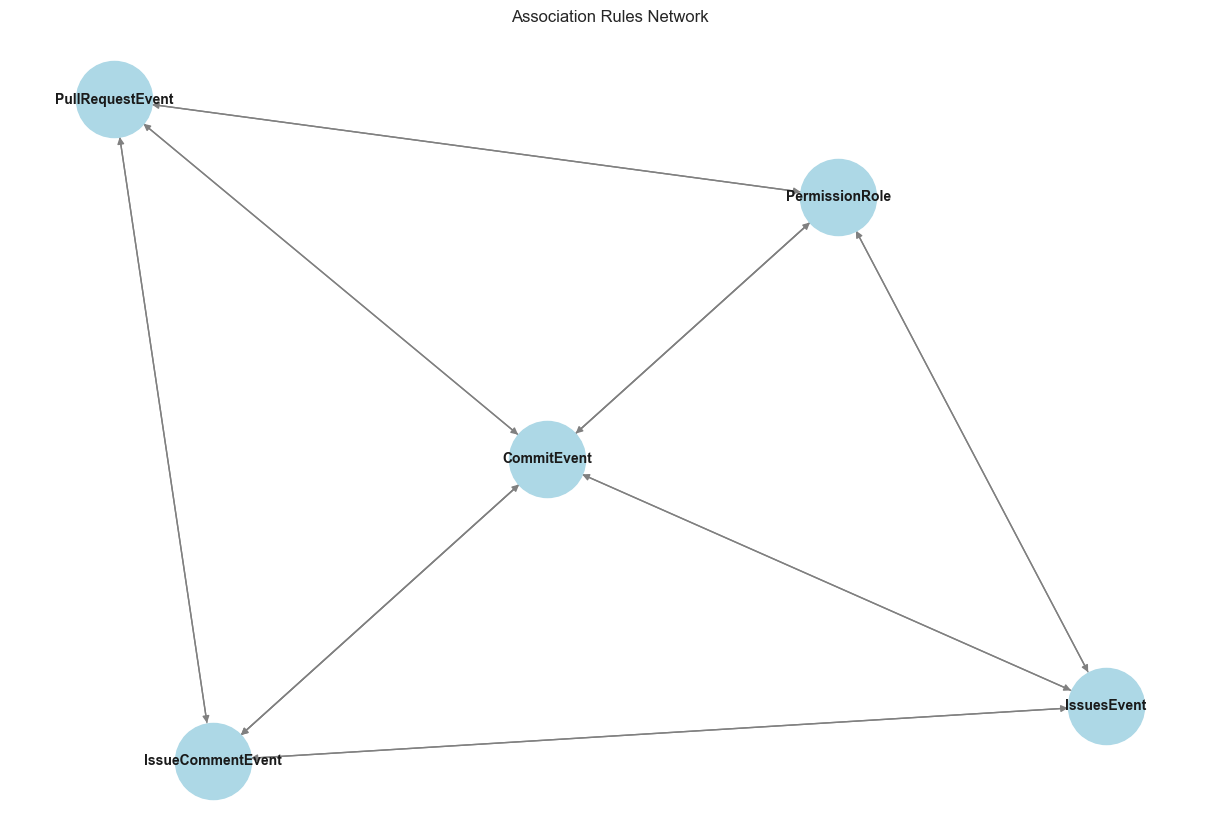

Rule: If a developers do [PullRequestEvent, IssuesEvent, IssueCommentEvent], they are likely to do [CommitEvent] with support=0.42857142857142855, confidence=0.75, lift=1.75.
Rule: If a developers do [IssuesEvent, PullRequestEvent, PermissionRole], they are likely to do [CommitEvent, IssueCommentEvent] with support=0.42857142857142855, confidence=0.75, lift=1.75.
Rule: If a developers do [CommitEvent, PermissionRole], they are likely to do [PullRequestEvent, IssuesEvent] with support=0.42857142857142855, confidence=1.0, lift=1.75.
Rule: If a developers do [PullRequestEvent, IssuesEvent], they are likely to do [CommitEvent, PermissionRole] with support=0.42857142857142855, confidence=0.75, lift=1.75.
Rule: If a developers do [CommitEvent], they are likely to do [PullRequestEvent, IssuesEvent, IssueCommentEvent] with support=0.42857142857142855, confidence=1.0, lift=1.75.
Rule: If a developers do [CommitEvent], they are likely to do [IssuesEvent, PullRequestEvent, PermissionRole] with su

In [67]:
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

def binarize_data(df, threshold_dict):
    df_bin = pd.DataFrame()
    for column in df.columns:
        threshold = threshold_dict.get(column, 0)
        df_bin[column] = df[column] > threshold
    return df_bin

thresholds = {
    'Contributions': 200,
    'CommitEvent': 10,
    'Languages': 2,
    'IssueCommentEvent': 10,
    'PullRequestEvent': 5,
    'PullRequestReviewEvent': 1,
    'IssuesEvent': 100,
    'CreateIssueEvent': 3,
    'PermissionRole': 1,
    'Add-Del': 100
}

data_bin = binarize_data(df, thresholds)

frequent_itemsets = apriori(data_bin, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = rules[rules['lift'] > 1.5]
rules = rules.sort_values(by='lift', ascending=False).head(10)

G = nx.DiGraph()
for idx, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title('Association Rules Network')
plt.show()

def interpret_rules(rules):
    for idx, rule in rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        print(f"Rule: If a developers do [{antecedents}], they are likely to do [{consequents}] with support={rule['support']}, confidence={rule['confidence']}, lift={rule['lift']}.")

interpret_rules(rules)

Секвенционный анализ: исследование последовательности действий разработчиков (например, используя метод последовательного паттерн-майнинга), чтобы выявить типичные последовательности событий.

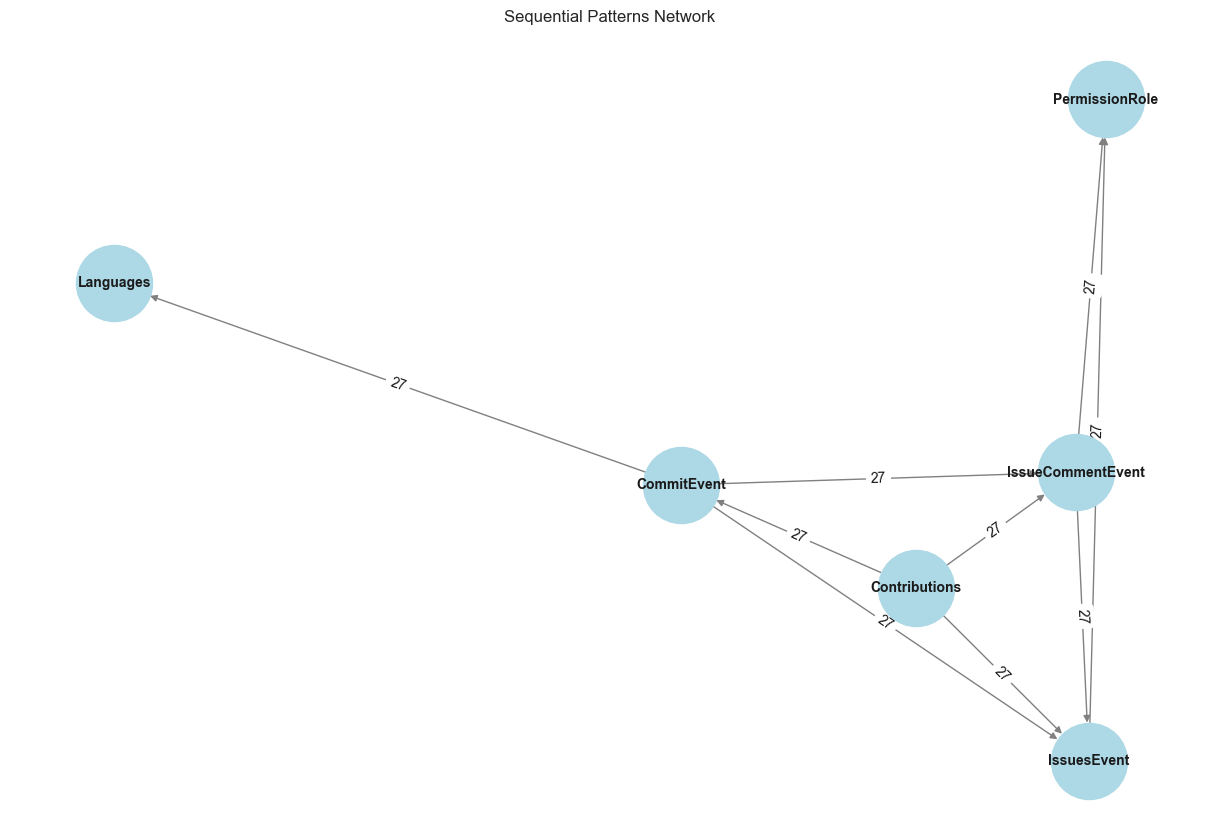

Pattern: Contributions -> CommitEvent with support=28
Pattern: Contributions with support=28
Pattern: CommitEvent with support=28
Pattern: Contributions -> CommitEvent -> IssuesEvent -> PermissionRole with support=27
Pattern: Contributions -> CommitEvent -> IssueCommentEvent -> IssuesEvent -> PermissionRole with support=27
Pattern: Contributions -> IssueCommentEvent -> PermissionRole with support=27
Pattern: CommitEvent -> Languages with support=27
Pattern: CommitEvent -> IssueCommentEvent with support=27
Pattern: Contributions -> IssuesEvent with support=27
Pattern: Contributions -> IssueCommentEvent with support=27


In [76]:
from pymining import seqmining

def convert_to_sequences(df):
    sequences = []
    for index, row in df.iterrows():
        sequence = []
        for col in df.columns:
            if row[col] > 0:
                sequence.append(col)
        sequences.append(sequence)
    return sequences

sequences = convert_to_sequences(df)

min_support = 2
result = seqmining.freq_seq_enum(sequences, min_support)

# Преобразование результата в DataFrame для удобства
patterns = []
for pattern in result:
    patterns.append((pattern[0], pattern[1]))

patterns_df = pd.DataFrame(patterns, columns=['Pattern', 'Support'])

top_n = 10
patterns_df = patterns_df.sort_values(by='Support', ascending=False).head(top_n)

G = nx.DiGraph()

for pattern, support in patterns_df.values:
    for i in range(len(pattern) - 1):
        G.add_edge(pattern[i], pattern[i + 1], weight=support)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Sequential Patterns Network')
plt.show()

# Интерпретация результатов
def interpret_patterns(patterns_df):
    for idx, row in patterns_df.iterrows():
        pattern = ' -> '.join(row['Pattern'])
        support = row['Support']
        print(f"Pattern: {pattern} with support={support}")

interpret_patterns(patterns_df)

Шаг 6: Проверка и валидация результатов. Проверим стабильность и качество кластеров, используя методы перекрестной проверки (cross-validation) и внешние индексы (например, Adjusted Rand Index).

1. Перекрестная энтропия измеряет, насколько хорошо одна кластеризация предсказывает другую. Это можно использовать для проверки стабильности кластеров при разных запусках алгоритма кластеризации.

2. Внешние индексы, такие как Adjusted Rand Index (ARI) и Normalized Mutual Information (NMI), измеряют качество кластеров по сравнению с некоторой эталонной кластеризацией или истинными метками классов (если они известны).

In [77]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics.cluster import entropy

kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(x)

kmeans_2 = KMeans(n_clusters=7, random_state=43)
clusters_2 = kmeans_2.fit_predict(x)

def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

p, q = np.bincount(clusters) / len(clusters), np.bincount(clusters_2) / len(clusters_2)
cross_entropy_value = cross_entropy(p, q)
print(f"Cross Entropy: {cross_entropy_value}")

ari = adjusted_rand_score(clusters, clusters_2)
nmi = normalized_mutual_info_score(clusters, clusters_2)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Cross Entropy: 1.9339084132034758
Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0


c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sasho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Интерпретация результатов:

- Перекрестная энтропия: Низкое значение перекрестной энтропии указывает на то, что кластеризация стабильна и одна кластеризация хорошо предсказывает другую.
- Adjusted Rand Index (ARI): Значение ARI ближе к 1 указывает на высокую согласованность между двумя кластеризациями.
- Normalized Mutual Information (NMI): Значение NMI ближе к 1 указывает на высокую взаимную информацию между двумя кластеризациями.